Text(0.06, 0.4, 'True difference in means: 2\n95% CI: (1.460, 2.406)')

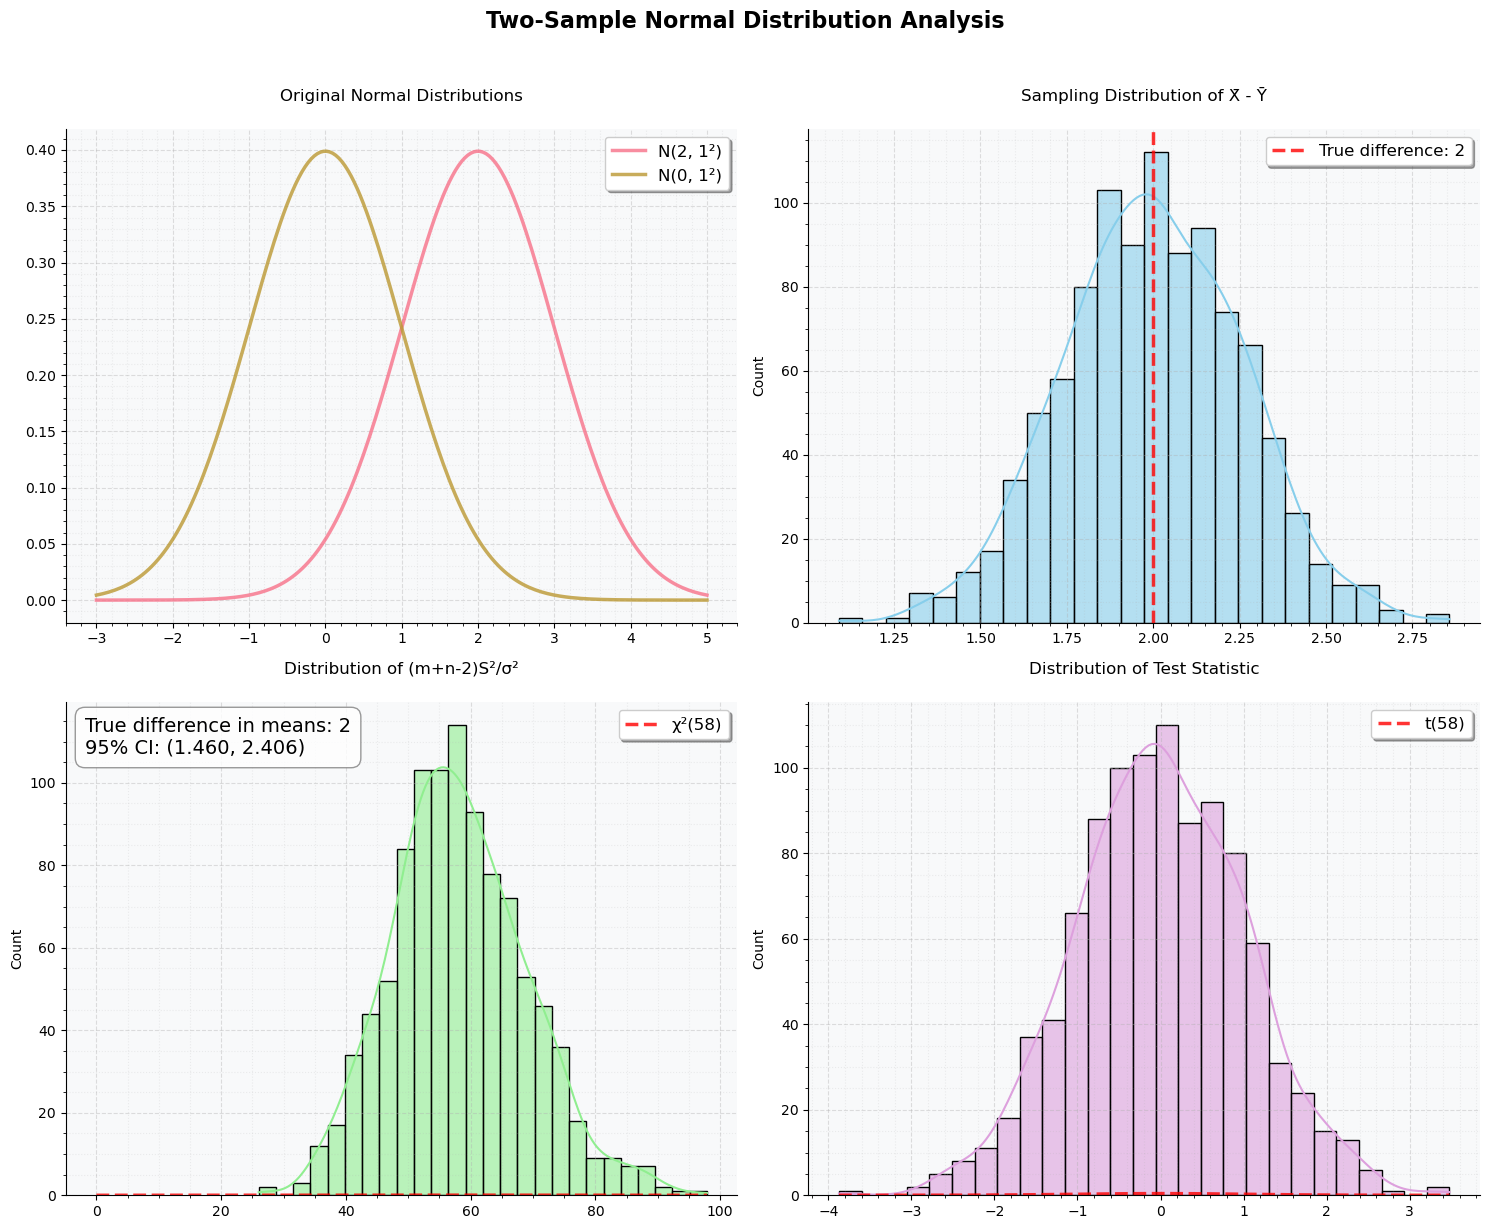

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Set style
sns.set_palette("husl")
np.random.seed(42)

def simulate_samples(mu1, mu2, sigma, m, n, num_simulations=1000):
    """Simulate samples from two normal distributions and calculate statistics"""
    X = np.random.normal(mu1, sigma, (num_simulations, m))
    Y = np.random.normal(mu2, sigma, (num_simulations, n))
    
    X_means = np.mean(X, axis=1)
    Y_means = np.mean(Y, axis=1)
    
    X_var = np.sum((X - X_means[:, np.newaxis])**2, axis=1)
    Y_var = np.sum((Y - Y_means[:, np.newaxis])**2, axis=1)
    pooled_var = (X_var + Y_var) / (m + n - 2)
    
    diff_means = X_means - Y_means
    pooled_std = np.sqrt(pooled_var)
    t_stat = (diff_means - (mu1 - mu2)) / (pooled_std * np.sqrt(1/m + 1/n))
    
    return diff_means, pooled_var, t_stat

def plot_distributions(mu1, mu2, sigma, m, n):
    """Create enhanced visualizations to demonstrate the theoretical results"""
    diff_means, pooled_var, t_stat = simulate_samples(mu1, mu2, sigma, m, n)
    
    # Create figure with higher DPI
    fig, axes = plt.subplots(2, 2, figsize=(15, 12), dpi=100)
    fig.suptitle('Two-Sample Normal Distribution Analysis', 
                fontsize=16, fontweight='bold', y=1.02)
    
    # Style settings for all plots
    plot_style = {
        'linewidth': 2.5,
        'alpha': 0.8
    }
    
    # Plot 1: Original distributions
    x = np.linspace(min(mu1, mu2) - 3*sigma, max(mu1, mu2) + 3*sigma, 200)
    axes[0, 0].plot(x, stats.norm.pdf(x, mu1, sigma), 
                    label=f'N({mu1}, {sigma}²)', **plot_style)
    axes[0, 0].plot(x, stats.norm.pdf(x, mu2, sigma), 
                    label=f'N({mu2}, {sigma}²)', **plot_style)
    axes[0, 0].set_title('Original Normal Distributions', fontsize=12, pad=20)
    axes[0, 0].legend(frameon=True, fancybox=True, shadow=True, fontsize=12)
    
    # Plot 2: Distribution of difference in means
    sns.histplot(diff_means, kde=True, ax=axes[0, 1], 
                color='skyblue', alpha=0.6)
    axes[0, 1].axvline(mu1 - mu2, color='red', linestyle='--',
                      label=f'True difference: {mu1 - mu2}', **plot_style)
    axes[0, 1].set_title('Sampling Distribution of X̄ - Ȳ', fontsize=12, pad=20)
    axes[0, 1].legend(frameon=True, fancybox=True, shadow=True,fontsize=12)
    
    # Plot 3: Chi-square distribution of pooled variance
    scaled_var = (m + n - 2) * pooled_var / sigma**2
    sns.histplot(scaled_var, kde=True, ax=axes[1, 0], 
                color='lightgreen', alpha=0.6)
    x_chi = np.linspace(0, max(scaled_var), 200)
    axes[1, 0].plot(x_chi, stats.chi2.pdf(x_chi, m + n - 2),
                    'r--', label=f'χ²({m + n - 2})', **plot_style)
    axes[1, 0].set_title('Distribution of (m+n-2)S²/σ²', fontsize=12, pad=20)
    axes[1, 0].legend(frameon=True, fancybox=True, shadow=True,fontsize=12)
    
    # Plot 4: t-distribution of test statistic
    sns.histplot(t_stat, kde=True, ax=axes[1, 1], 
                color='plum', alpha=0.6)
    x_t = np.linspace(min(t_stat), max(t_stat), 200)
    axes[1, 1].plot(x_t, stats.t.pdf(x_t, m + n - 2),
                    'r--', label=f't({m + n - 2})', **plot_style)
    axes[1, 1].set_title('Distribution of Test Statistic', fontsize=12, pad=20)
    axes[1, 1].legend(frameon=True, fancybox=True, shadow=True,fontsize=12)
    
    # Enhance all subplots
    for ax in axes.flat:
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.minorticks_on()
        ax.grid(True, which='minor', linestyle=':', alpha=0.2)
        ax.set_facecolor('#f8f9fa')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
    plt.tight_layout()
    return fig

def calculate_confidence_interval(x, y, alpha=0.05):
    """Calculate confidence interval for difference in means"""
    m, n = len(x), len(y)
    x_mean, y_mean = np.mean(x), np.mean(y)
    
    s2 = (np.sum((x - x_mean)**2) + np.sum((y - y_mean)**2)) / (m + n - 2)
    t_crit = stats.t.ppf(1 - alpha/2, m + n - 2)
    se = np.sqrt(s2 * (1/m + 1/n))
    
    ci_lower = (x_mean - y_mean) - t_crit * se
    ci_upper = (x_mean - y_mean) + t_crit * se
    
    return ci_lower, ci_upper

# Example usage
mu1, mu2 = 2, 0  # True means
sigma = 1        # Common standard deviation
m, n = 30, 30    # Sample sizes

x_sample = np.random.normal(mu1, sigma, m)
y_sample = np.random.normal(mu2, sigma, n)

fig = plot_distributions(mu1, mu2, sigma, m, n)
ci_lower, ci_upper = calculate_confidence_interval(x_sample, y_sample)

# Add results text box
results_text = (f"True difference in means: {mu1 - mu2}\n"
               f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")
plt.figtext(0.06, 0.4, results_text, 
            bbox=dict(facecolor='white', alpha=0.8, 
                     edgecolor='gray', boxstyle='round,pad=0.5'),
            fontsize=14)

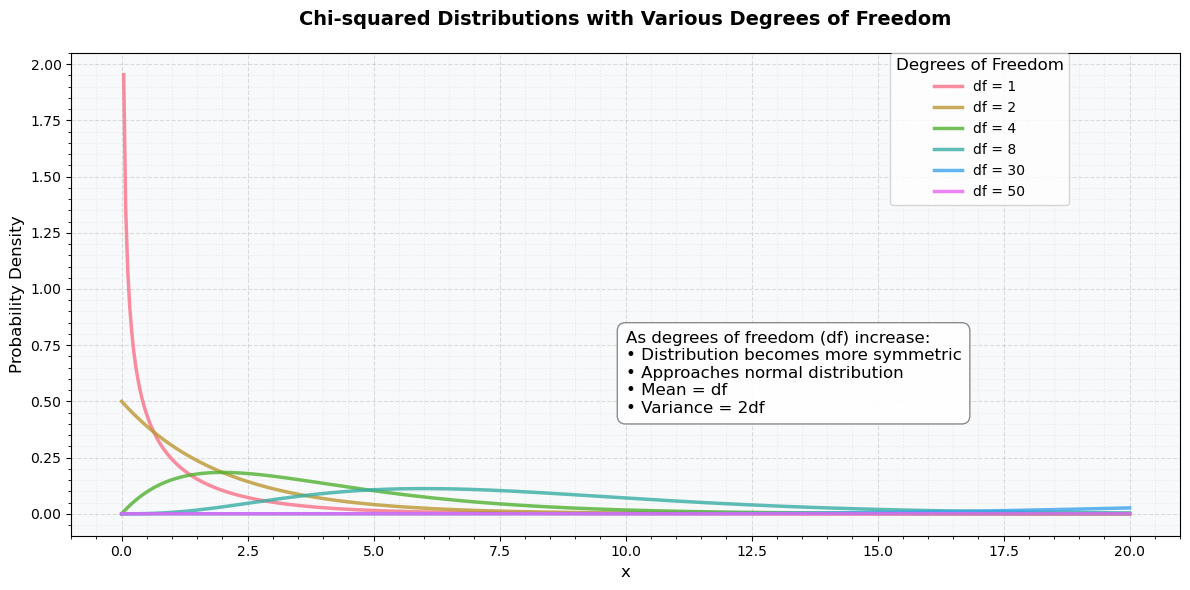

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Set style

sns.set_palette("husl")

# Create figure with high DPI for better resolution
plt.figure(figsize=(12, 6), dpi=100)

# X-axis points with finer granularity
x = np.linspace(0, 20, 500)

# Plot chi-squared distributions
dfs = [1, 2, 4, 8, 30, 50]
for df in dfs:
    plt.plot(x, stats.chi2.pdf(x, df), 
             label=f'df = {df}', 
             linewidth=2.5, 
             alpha=0.8)

# Enhance title and labels
plt.title('Chi-squared Distributions with Various Degrees of Freedom', 
          fontsize=14, 
          pad=20, 
          fontweight='bold')
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

# Customize legend
plt.legend(title='Degrees of Freedom',
          title_fontsize=12,
          fontsize=10,
          bbox_to_anchor=(0.9, 1),
          borderaxespad=0.)

# Customize grid
plt.grid(True, linestyle='--', alpha=0.4)

# Add text explanation with enhanced formatting
explanation = """As degrees of freedom (df) increase:
• Distribution becomes more symmetric
• Approaches normal distribution
• Mean = df
• Variance = 2df"""

plt.text(10, 0.45, explanation,
         bbox=dict(facecolor='white', 
                  alpha=0.9,
                  edgecolor='gray',
                  boxstyle='round,pad=0.5'),
         fontsize=12)

# Adjust layout
plt.tight_layout()

# Set background color
plt.gca().set_facecolor('#f8f9fa')
plt.gcf().set_facecolor('#ffffff')

# Add minor grid lines
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', alpha=0.2)